In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import sklearn as sk

# CSV laden
df = pd.read_csv("../data/results-surveyPilot.csv")
print(df.columns.tolist())

# Bereinigung des Datensatzes
# Entferne Zeilen, in denen das Alter 0 ist
df = df[df["Wie alt sind Sie? (Angabe in Jahren)"] != 0]

# Überblick
df.head()

ImportError: Unable to import required dependencies:
numpy: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [11]:
# SPES-Unterteilung
sl_items = [
    "Ich hatte das Gefühl, dass ich in der Umgebung der Projektion tatsächlich anwesend war.",
    "Es schien, als ob ich tatsächlich an der Darstellung beteiligt war.",
    "Es kam mir vor, als hätte sich mein wahrer Standort in die Umgebung der Projektion verschoben.",
    "Ich hatte das Gefühl, dass ich in der Umgebung der Projektion physisch anwesend war."
]

pa_items = [
    "Die Objekte in der Projektion gaben mir das Gefühl, dass ich mit ihnen etwas anfangen kann.",
    "Ich hatte den Eindruck, dass ich in der Umgebung der Projektion agieren konnte.",
    "Ich hatte das Gefühl, dass ich mich zwischen den Objekten in der Projektion bewegen konnte.",
    "Ich hatte den Eindruck, dass ich in der Umgebung der Projektion alles tun konnte, was ich wollte."
]


In [12]:
# Mittelwerte für SL (Immersion) und PA (Interaktivität) der Gesamtheit
df["SL_Mean"] = df[sl_items].mean(axis=1)
df["PA_Mean"] = df[pa_items].mean(axis=1)


In [13]:
df[["SL_Mean", "PA_Mean"]].describe()
# Deskripivie Statistik für SL und PA der Gesamtheit


,SL_Mean,PA_Mean
count,104.000000,104.000000
mean,2.838942,3.062500
std,0.963483,0.919549
min,1.000000,1.000000
25%,2.000000,2.500000
50%,3.000000,3.125000
75%,3.500000,3.750000
max,5.000000,5.000000


In [14]:
# Hilfsspalte "Grashalm_interaktion_bemerkt" vereinfachen
df["Grashalm_interaktion_bemerkt"] = df[
    "Haben Sie bemerkt, dass Sie die Grashalmprojektion interaktiv beeinflussen können?"
].apply(lambda x: "Ja" if x == "Ja" else "Nein")

In [15]:
df.groupby("Grashalm_interaktion_bemerkt")[["SL_Mean", "PA_Mean"]].mean()
# Mittelwerte für SL und PA nach Interaktion erkannt


,SL_Mean,PA_Mean
Grashalm_interaktion_bemerkt,,
Ja,3.267241,3.396552
Nein,2.673333,2.933333


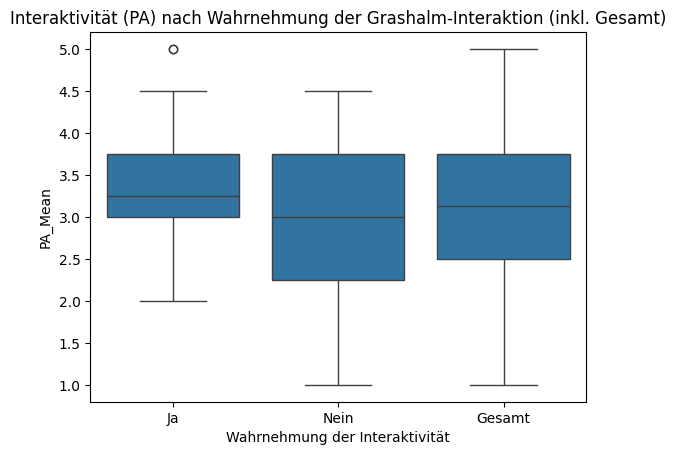

In [ ]:
# Neue Kopie der Daten mit "Gesamt"-Gruppe
df_gesamt = df.copy()
df_gesamt["Grashalm_interaktion_bemerkt"] = "Gesamt"

# Kombinieren der Gruppen
df_combined = pd.concat([df, df_gesamt], ignore_index=True)

# Boxplot mit allen drei Gruppen
sns.boxplot(data=df_combined, x="Grashalm_interaktion_bemerkt", y="PA_Mean")
plt.title("Interaktivität (PA) nach Wahrnehmung der Grashalm-Interaktion (inkl. Gesamt)")
plt.xlabel("Wahrnehmung der Interaktivität")
plt.ylabel("PA_Mean")
plt.show()


In [17]:
ux_items = [
    "Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.",
    "Die Steuerung des Systems war intuitiv und leicht verständlich.",
    "Ich konnte meine beabsichtigten Aktionen problemlos ausführen."
]
# UX Items (Neue Skala für Systemeffizienz)

In [18]:
df_interaktiv = df[df["Grashalm_interaktion_bemerkt"] == "Ja"].copy()
# Neuer Dataframe für Interaktion erkannt


In [23]:
from scipy.stats import zscore
from numpy import nanmean

def cronbach_alpha(df_subset):
    df_corr = df_subset.corr()
    N = len(df_subset.columns)
    mean_corr = df_corr.where(~np.eye(N, dtype=bool)).mean().mean()
    return (N * mean_corr) / (1 + (N - 1) * mean_corr)

print(cronbach_alpha(df_interaktiv[ux_items]))
# Cronbachs Alpha für UX Items (Interaktion erkannt)

0.7606161515993863


In [24]:
print("Cronbach’s Alpha für SL:", cronbach_alpha(df[sl_items]))
print("Cronbach’s Alpha für PA:", cronbach_alpha(df[pa_items]))
print("Cronbach’s Alpha für SPES (gesamt):", cronbach_alpha(df[sl_items + pa_items]))
# Cronbach’s Alpha für SL, PA und SPES (gesamt)

Cronbach’s Alpha für SL: 0.7960339915947849
Cronbach’s Alpha für PA: 0.6864760305416128
Cronbach’s Alpha für SPES (gesamt): 0.8144908948960342


In [71]:
# Gruppe: Interaktion bemerkt
df_interaktion_bemerkt = df[df["Grashalm_interaktion_bemerkt"] == "Ja"]

# Gruppe: Interaktion nicht bemerkt
df_interaktion_nicht_bemerkt = df[df["Grashalm_interaktion_bemerkt"] == "Nein"]

# Gruppe: Gesamt (alle Teilnehmenden)
df_gesamt = df.copy()

In [72]:
# Interessante Variablen
interessante_variablen = [
    "SL_Mean", "PA_Mean",
    "Wie zufrieden waren Sie insgesamt mit der Rauminstallation?",
    "Würden Sie diese Installation weiterempfehlen?",
    "Wie alt sind Sie? (Angabe in Jahren)",
    "Welchem Geschlecht fühlen Sie sich zugehörig?",
    "Haben Sie bereits Erfahrung mit interaktiven Kunstinstallationen?",
    "Wie lange haben Sie sich in der Installation aufgehalten haben?"
]

# Deskriptive Statistik für alle Gruppen
print("Deskriptive Statistik - Interaktion bemerkt")
print(df_interaktion_bemerkt[interessante_variablen].describe())

print("\nDeskriptive Statistik - Interaktion nicht bemerkt")
print(df_interaktion_nicht_bemerkt[interessante_variablen].describe())

print("\nDeskriptive Statistik - Gesamt")
print(df_gesamt[interessante_variablen].describe())

Deskriptive Statistik - Interaktion bemerkt
         SL_Mean    PA_Mean  \
count  29.000000  29.000000   
mean    3.267241   3.396552   
std     0.787545   0.766244   
min     1.500000   2.000000   
25%     3.000000   3.000000   
50%     3.500000   3.250000   
75%     3.750000   3.750000   
max     5.000000   5.000000   

       Wie zufrieden waren Sie insgesamt mit der Rauminstallation?  \
count                                          29.000000             
mean                                            3.862069             
std                                             0.953345             
min                                             2.000000             
25%                                             4.000000             
50%                                             4.000000             
75%                                             4.000000             
max                                             5.000000             

       Wie alt sind Sie? (Angabe in Jahren)  

In [24]:
#Durchführen von ttest

# Gruppen aufteilen
gruppe_ja = df[df["Grashalm_interaktion_bemerkt"] == "Ja"]
gruppe_nein = df[df["Grashalm_interaktion_bemerkt"] == "Nein"]


In [25]:
#Berechnung für PA_Mean
from scipy.stats import ttest_ind

# Werte extrahieren
pa_ja = gruppe_ja["PA_Mean"]
pa_nein = gruppe_nein["PA_Mean"]

# Welch's t-Test (empfohlen bei ungleicher Varianz/Größe)
t_pa, p_pa = ttest_ind(pa_ja, pa_nein, equal_var=False)

print(f"t-Wert PA_Mean: {t_pa:.3f}, p-Wert: {p_pa:.3f}")


t-Wert PA_Mean: 2.626, p-Wert: 0.011


In [26]:
#Berechnung für SL_Mean
sl_ja = gruppe_ja["SL_Mean"]
sl_nein = gruppe_nein["SL_Mean"]

t_sl, p_sl = ttest_ind(sl_ja, sl_nein, equal_var=False)
print(f"t-Wert SL_Mean: {t_sl:.3f}, p-Wert: {p_sl:.3f}")

t-Wert SL_Mean: 3.073, p-Wert: 0.003


In [29]:
#SPES Mean berechnen
# Berechnung von SPES_Mean
spes_items = sl_items + pa_items  # SL- und PA-Items kombinieren
df["SPES_Mean"] = df[spes_items].mean(axis=1)

In [30]:
#Berechnung für SPES
spes_ja = gruppe_ja["SPES_Mean"]
spes_nein = gruppe_nein["SPES_Mean"]

t_spes, p_spes = ttest_ind(spes_ja, spes_nein, equal_var=False)
print(f"t-Wert SPES_Mean: {t_spes:.3f}, p-Wert: {p_spes:.3f}")


t-Wert SPES_Mean: 3.354, p-Wert: 0.001


In [ ]:
#Berechnung Cohens d (Effektstärke)
def cohens_d(x, y):
    nx, ny = len(x), len(y)
    pooled_std = np.sqrt(((nx - 1)*x.std()**2 + (ny - 1)*y.std()**2) / (nx + ny - 2))
    return (x.mean() - y.mean()) / pooled_std

d_pa = cohens_d(gruppe_ja["PA_Mean"], gruppe_nein["PA_Mean"])
d_sl = cohens_d(gruppe_ja["SL_Mean"], gruppe_nein["SL_Mean"])
d_spes = cohens_d(gruppe_ja["SPES_Mean"], gruppe_nein["SPES_Mean"])


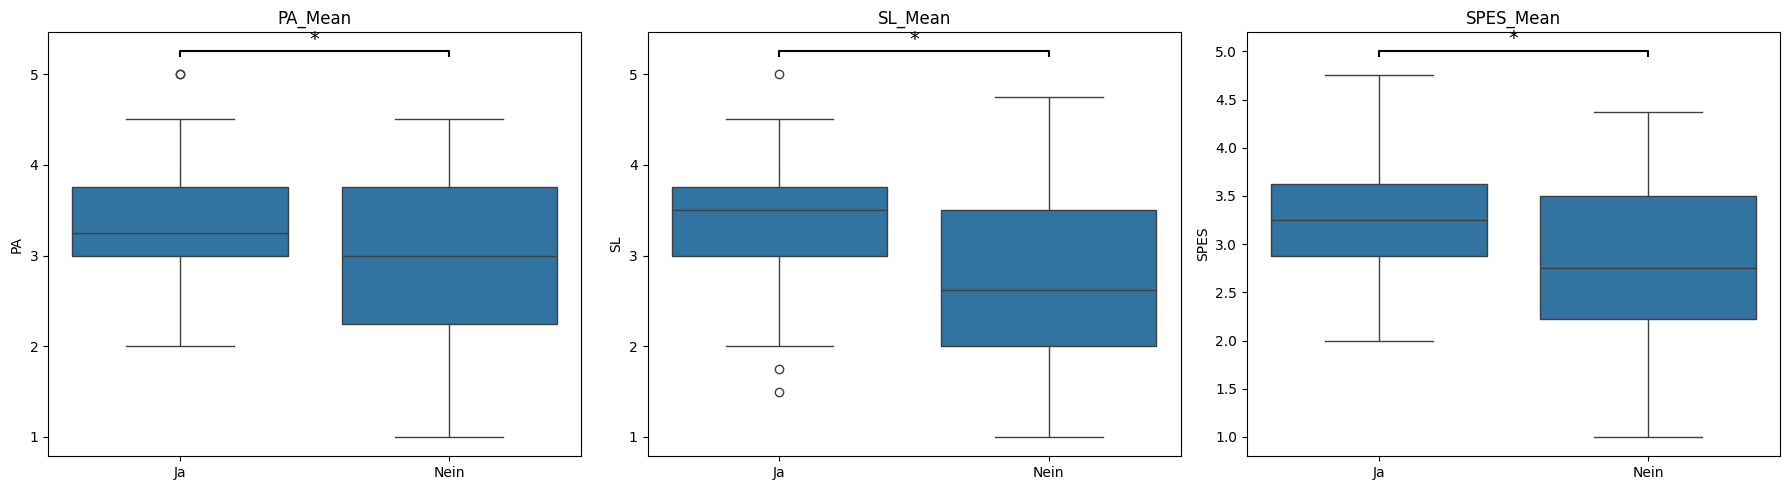

In [ ]:
#Visualisierung von ttests durch Boxplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot für PA
sns.boxplot(data=df, x="Grashalm_interaktion_bemerkt", y="PA_Mean", ax=axs[0])
axs[0].set_title("PA_Mean")
axs[0].set_xlabel("")
axs[0].set_ylabel("PA")

# Signifikanzbalken
y = df["PA_Mean"].max() + 0.2
axs[0].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[0].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

# Plot für SL
sns.boxplot(data=df, x="Grashalm_interaktion_bemerkt", y="SL_Mean", ax=axs[1])
axs[1].set_title("SL_Mean")
axs[1].set_xlabel("")
axs[1].set_ylabel("SL")
y = df["SL_Mean"].max() + 0.2
axs[1].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[1].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

# Plot für SPES
sns.boxplot(data=df, x="Grashalm_interaktion_bemerkt", y="SPES_Mean", ax=axs[2])
axs[2].set_title("SPES_Mean")
axs[2].set_xlabel("")
axs[2].set_ylabel("SPES")
y = df["SPES_Mean"].max() + 0.2
axs[2].plot([0, 0, 1, 1], [y, y+0.05, y+0.05, y], lw=1.5, c='black')
axs[2].text(0.5, y + 0.08, "*", ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
# Ergebnisse visualisieren in Tabelle
results_df = pd.DataFrame({
    "Variable": ["PA_Mean", "SL_Mean", "SPES_Mean"],
    "t-Wert": [2.626, 3.073, 3.354],       # aus deinem Output
    "p-Wert": [0.011, 0.003, 0.001],
    "Cohen's d": [d_pa, d_sl, d_spes]
})

display(results_df)


,Variable,t-Wert,p-Wert,Cohen's d
0,PA_Mean,2.626,0.011,0.523027
1,SL_Mean,3.073,0.003,0.604523
2,SPES_Mean,3.354,0.001,0.656707


In [36]:
# UX-Mittelwert berechnen – nur für Gruppe "Ja"
df_interaktiv = df[df["Grashalm_interaktion_bemerkt"] == "Ja"].copy()
df_interaktiv["UX_Mean"] = df_interaktiv[ux_items].mean(axis=1)

In [37]:
from scipy.stats import pearsonr

# A) Immersion vs. Interaktivität (gesamte Stichprobe)
r_sl_pa, p_sl_pa = pearsonr(df["SL_Mean"], df["PA_Mean"])

# B) UX vs. Interaktivität (nur Gruppe "Ja")
r_ux_pa, p_ux_pa = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["PA_Mean"])

# C) UX vs. Immersion (nur Gruppe "Ja")
r_ux_sl, p_ux_sl = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SL_Mean"])

# D) UX vs. SPES (nur Gruppe "Ja")
r_ux_spes, p_ux_spes = pearsonr(df_interaktiv["UX_Mean"], df_interaktiv["SPES_Mean"])


In [38]:
# Tabelle erstellen
correlation_df = pd.DataFrame({
    "Korrelation": [
        "SL_Mean ↔ PA_Mean (gesamt)",
        "UX_Mean ↔ PA_Mean (nur 'Ja')",
        "UX_Mean ↔ SL_Mean (nur 'Ja')",
        "UX_Mean ↔ SPES_Mean (nur 'Ja')"
    ],
    "r-Wert": [r_sl_pa, r_ux_pa, r_ux_sl, r_ux_spes],
    "p-Wert": [p_sl_pa, p_ux_pa, p_ux_sl, p_ux_spes]
})

# Ergebnisse anzeigen
display(correlation_df)


,Korrelation,r-Wert,p-Wert
0,SL_Mean ↔ PA_Mean (gesamt),0.510256,2.692467e-08
1,UX_Mean ↔ PA_Mean (nur 'Ja'),0.611965,4.190458e-04
2,UX_Mean ↔ SL_Mean (nur 'Ja'),0.570641,1.227342e-03
3,UX_Mean ↔ SPES_Mean (nur 'Ja'),0.701127,2.270294e-05


In [42]:
# Neue Altersgruppen erstellen (z. B. in 10er-Schritten)
df["Altersgruppe"] = pd.cut(
    df["Wie alt sind Sie? (Angabe in Jahren)"],
    bins=[0, 19, 29, 39, 49, 59, 120],
    labels=["<20", "20–29", "30–39", "40–49", "50–59", "60+"]
)


In [43]:
from scipy.stats import chi2_contingency

# Kontingenztabelle erstellen
alter_kontingenz = pd.crosstab(df["Grashalm_interaktion_bemerkt"], df["Altersgruppe"])

# Chi²-Test berechnen
chi2_alt, p_alt, dof_alt, expected_alt = chi2_contingency(alter_kontingenz)

# Ergebnisse ausgeben
print("Chi²-Wert:", round(chi2_alt, 3))
print("p-Wert:", round(p_alt, 3))
print("Freiheitsgrade:", dof_alt)
print("\nErwartete Häufigkeiten:")
print(pd.DataFrame(expected_alt, index=alter_kontingenz.index, columns=alter_kontingenz.columns))


Chi²-Wert: 13.677
p-Wert: 0.018
Freiheitsgrade: 5

Erwartete Häufigkeiten:
Altersgruppe                       <20      20–29     30–39     40–49  \
Grashalm_interaktion_bemerkt                                            
Ja                            1.951923   6.692308  3.346154  3.067308   
Nein                          5.048077  17.307692  8.653846  7.932692   

Altersgruppe                      50–59        60+  
Grashalm_interaktion_bemerkt                        
Ja                             5.855769   8.086538  
Nein                          15.144231  20.913462  


In [45]:
#Validierung der UX-SKala
# Nur Daten mit wahrgenommener Interaktion
df_ux = df[df["Grashalm_interaktion_bemerkt"] == "Ja"]

# UX-Items extrahieren
ux_items = [
    "Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.",
    "Die Steuerung des Systems war intuitiv und leicht verständlich.",
    "Ich konnte meine beabsichtigten Aktionen problemlos ausführen."
]

# Korrelationsmatrix berechnen
korrelationsmatrix = df_ux[ux_items].corr()

# Ausgabe
print("Inter-Item-Korrelationsmatrix:")
print(korrelationsmatrix.round(2))
# Visualisierung der Korrelationsmatrix

Inter-Item-Korrelationsmatrix:
                                                    Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.  \
Das System reagierte schnell und ohne spürbare ...                                               1.00                                
Die Steuerung des Systems war intuitiv und leic...                                               0.26                                
Ich konnte meine beabsichtigten Aktionen proble...                                               0.38                                

                                                    Die Steuerung des Systems war intuitiv und leicht verständlich.  \
Das System reagierte schnell und ohne spürbare ...                                               0.26                 
Die Steuerung des Systems war intuitiv und leic...                                               1.00                 
Ich konnte meine beabsichtigten Aktionen proble...                         

In [47]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# UX-Daten standardisieren (wichtig für PCA!)
scaler = StandardScaler()
ux_scaled = scaler.fit_transform(df_ux[ux_items])

# PCA auf 1 Faktor
pca = PCA(n_components=1)
pca.fit(ux_scaled)

# Faktorladungen
loadings = pd.Series(pca.components_[0], index=ux_items)

# Ergebnis anzeigen
print("\nFaktorladungen der UX-Items:")
print(loadings.round(2))

# Anteil erklärter Varianz
print("\nErklärte Varianz durch Faktor 1:", round(pca.explained_variance_ratio_[0]*100, 2), "%")



Faktorladungen der UX-Items:
Das System reagierte schnell und ohne spürbare Verzögerung auf meine Eingaben.    0.39
Die Steuerung des Systems war intuitiv und leicht verständlich.                   0.64
Ich konnte meine beabsichtigten Aktionen problemlos ausführen.                    0.66
dtype: float64

Erklärte Varianz durch Faktor 1: 69.64 %
